# Advanced Optimization Methods

## Homework Assignment 2.2

### Problem 1 (15pts)

__Problem 1.1__ (5pts) Consider the finite-sum optimization problem
$$
  f(x) = \frac{1}{n}\sum_{i=1}^n f_i(x),
$$
where each component function $f_i:\mathbb{R}^d \to \mathbb{R}$ is differentiable and $L$-smooth.

Let $\tilde{x}$ be a fixed reference point and define the SVRG gradient estimator at iterate $x_t$ as
$$
  g_t = \nabla f_{i_t}(x_t) - \nabla f_{i_t}(\tilde{x}) + \nabla f(\tilde{x}),
$$
where $i_t$ is chosen uniformly at random from $\{1, ... ,n\}$.


 1. __Unbiasedness.__ Show that

  $$
    \mathbb{E}\big[g_t \mid x_t, \tilde{x}\big] = \nabla f(x_t).
  $$

  2. __Variance reduction bound.__ Assume that each $f_i$ is $L$-smooth, i.e. its gradient is $L$-Lipschitz. For some numerical constant $C$, show that 
  $$
    \mathbb{E}\big[\|g_t - \nabla f(x_t)\|^2 \mid x_t, \tilde{x}\big]
    \le C L^2 \|x_t - \tilde{x}\|^2.
  $$
  Interpret this inequality and explain when is the variance small.

#### __Solution__

----

1. __Unbiasedness:__

$$
\mathbb{E}[g_t \mid x_t, \tilde{x}] = \mathbb{E}[\nabla f_{i_t}(x_t)] - \mathbb{E}[\nabla f_{i_t}(\tilde{x})] + \nabla f(\tilde{x})
$$

__1.1)__ $ \mathbb{E}[\nabla f_{i_t}(x_t) \mid x_t, \tilde{x}] $

$ P(i_t = i) = \frac{1}{n} $, therefore:  

$$
\mathbb{E}[\nabla f_{i_t}(x_t) \mid x_t, \tilde{x}] = \frac{1}{n}\sum_{i=1}^n \nabla f_i(x_t) = \nabla f(x_t),
$$

__1.2)__ $ \mathbb{E}[\nabla f_{i_t}(\tilde{x}) \mid x_t, \tilde{x}] $
$$
\mathbb{E}[\nabla f_{i_t}(\tilde{x}) \mid x_t, \tilde{x}] = \frac{1}{n}\sum_{i=1}^n \nabla f_i(\tilde{x}) = \nabla f(\tilde{x}).
$$

Summing up:
$$
\mathbb{E}[g_t \mid x_t, \tilde{x}] = \mathbb{E}[\nabla f_{i_t}(x_t)] - \mathbb{E}[\nabla f_{i_t}(\tilde{x})] + \nabla f(\tilde{x}) = \nabla f(x_t) - \nabla f(\tilde{x}) + \nabla f(\tilde{x}) = \nabla f(x_t).
$$

2. __Variance reduction bound:__

2.1) $\delta_t = g_t - \nabla f(x_t)$. Then
$$
\delta_t = \nabla f_{i_t}(x_t) - \nabla f_{i_t}(\tilde{x}) + \nabla f(\tilde{x}) - \nabla f(x_t).
$$

2.2) Using unbiasedness -> $\mathbb{E}[\delta_t] = 0$. Compute the second moment:

$$
\delta_t = [\nabla f_{i_t}(x_t) - \nabla f(x_t)] - [\nabla f_{i_t}(\tilde{x}) - \nabla f(\tilde{x})].
$$

$\|a - b\|^2 \leq 2\|a\|^2 + 2\|b\|^2 $ Hence,
$$
\mathbb{E}[\|\delta_t\|^2] \le 2\,\mathbb{E}\big[\|\nabla f_{i_t}(x_t) - \nabla f(x_t)\|^2\big] + 2\,\mathbb{E}\big[\|\nabla f_{i_t}(\tilde{x}) - \nabla f(\tilde{x})\|^2\big].
$$

2.3) For any $z$, by independence of $i_t$ and by $L$-smoothness of each $f_i$,
$$
\mathbb{E}\big[\|\nabla f_{i_t}(z) - \nabla f(z)\|^2\big] = \frac{1}{n}\sum_{i=1}^n \|\nabla f_i(z) - \nabla f(z)\|^2,
$$
For $L$-smooth $f_i$,
$$
\|\nabla f_i(x) - \nabla f_i(y)\| \le L\|x-y\|.
$$
Therefore,
$$
\mathbb{E}\big[\|\nabla f_{i_t}(x_t) - \nabla f(x_t)\|^2\big] \le \frac{1}{n}\sum_{i=1}^n L^2\|x_t - \tilde{x}\|^2 = L^2\|x_t-\tilde{x}\|^2,
$$
and similarly for $\tilde{x}$:
$$
\mathbb{E}[\|\delta_t\|^2] \le 4L^2\|x_t-\tilde{x}\|^2.
$$
As the result: $C=4$.

__Interpretation:__ The variance of the SVRG estimator is bounded by $O(L^2\|x_t-\tilde{x}\|^2)$. When $x_t$ is close to the reference point $\tilde{x}$, the variance is small, what is the goal.  

----

__Problem 1.2__ (10pts) In this coding task you will **implement and compare three stochastic optimization methods** on a finite-sum problem (here: least-squares linear regression):

1. **Plain SGD**
2. **Momentum SGD** (Polyak momentum)
3. **Momentum + SVRG-style variance reduction**

More concretely, you should:
- **Problem setup**: generate a synthetic linear regression dataset $\{(x_i, y_i)\}_{i=1}^n$ and define the finite-sum objective
  $$ f(w) = \frac{1}{n} \sum_{i=1}^n f_i(w), \quad f_i(w) = \tfrac{1}{2}(y_i - x_i^\top w)^2. $$
- **Implement three optimizers**:
  - SGD: $w_{t+1} = w_t - \eta \, \nabla f_{i_t}(w_t)$
  - Momentum SGD: $v_t = \beta v_{t-1} + (1-\beta) g_t,\; w_{t+1} = w_t - \eta v_t$
  - Momentum + SVRG: use outer epochs with a snapshot $\tilde{w}$ and full gradient $\nabla f(\tilde{w})$, and inside epochs use the control-variate estimator
    $$ g_t = \nabla f_{i_t}(w_t) - \nabla f_{i_t}(\tilde{w}) + \nabla f(\tilde{w}). $$
- **Experiments**: run all three methods from the same initialization and similar step sizes, and record
  - the objective value $f(w_t)$ versus **iteration** (step number), and
  - the objective value versus the **number of stochastic gradient evaluations**.
- **Discussion**: briefly comment (in the last markdown cell) on
  - which method converges fastest in terms of iterations and gradient evaluations, and
  - how the observed behavior relates to **variance reduction** and **momentum smoothing** of noisy gradients.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

# Plot settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported.")

Libraries imported.


In [17]:
# Generate a synthetic finite-sum least squares regression dataset
n = 2000   # number of samples
d = 20     # dimension
noise_std = 0.1

# True parameter
w_true = np.random.randn(d)

# Features
X = np.random.randn(n, d)

# Targets with Gaussian noise
y = X @ w_true + noise_std * np.random.randn(n)

print("Data shape X:", X.shape, "y:", y.shape)

def f_i(w, i):
    """Loss for sample i: 0.5 * (y_i - x_i^T w)^2."""
    return 0.5 * (y[i] - X[i] @ w) ** 2

def grad_f_i(w, i):
    """Gradient of f_i with respect to w."""
    r = y[i] - X[i] @ w
    return - r * X[i]

def f_full(w):
    """Full objective: average of f_i."""
    r = y - X @ w
    return 0.5 * np.mean(r ** 2)

def grad_f_full(w):
    """Full gradient: average of gradients."""
    r = y - X @ w
    return - (X.T @ r) / n

Data shape X: (2000, 20) y: (2000,)


In [18]:
def run_sgd(w0, steps, eta):
    w = w0.copy()
    obj_values = []
    grad_evals = []
    num_grad_evals = 0

    for _ in range(steps):
        i = np.random.randint(n)
        w = w - eta * grad_f_i(w, i)

        num_grad_evals += 1
        obj_values.append(f_full(w))
        grad_evals.append(num_grad_evals)
    return np.array(grad_evals), np.array(obj_values)

def run_momentum_sgd(w0, steps, eta, beta=0.9):
    w = w0.copy()
    v = np.zeros_like(w)
    obj_values = []
    grad_evals = []
    num_grad_evals = 0

    for _ in range(steps):
        i = np.random.randint(n)
        v = beta * v + (1 - beta) * grad_f_i(w, i)
        w = w - eta * v

        num_grad_evals += 1
        obj_values.append(f_full(w))
        grad_evals.append(num_grad_evals)
    return np.array(grad_evals), np.array(obj_values)

def run_momentum_svrg(w0, epochs, m, eta, beta=0.9):
    """Momentum + SVRG-style variance reduction.

    Args:
        w0: initial parameter
        epochs: number of outer loops
        m: inner steps per epoch
        eta: stepsize
        beta: momentum parameter

    Returns:
        grad_evals: number of individual gradient evaluations over time
        obj_values: objective values over time
    """
    w = w0.copy()
    v = np.zeros_like(w)

    obj_values = []
    grad_evals = []
    num_grad_evals = 0

    for epoch in range(epochs):
        w_tilde = w.copy()
        grad_full = grad_f_full(w_tilde)
        num_grad_evals += n
        
        for _ in range(m):
            i = np.random.randint(n)
            g = grad_f_i(w, i) - grad_f_i(w_tilde, i) + grad_full
            v = beta * v + (1 - beta) * g
            w = w - eta * v

            num_grad_evals += 2
            obj_values.append(f_full(w))
            grad_evals.append(num_grad_evals)
    return np.array(grad_evals), np.array(obj_values)

In [19]:
# Run experiments
w0 = np.zeros(d)

# Hyperparameters (chosen to give reasonable but not perfect tuning)
steps = 8000
eta_sgd = 0.02
eta_mom = 0.02
eta_mom_svrg = 0.01
beta = 0.9

# For SVRG: number of epochs and inner steps m
epochs = 20
m = 200  # total inner steps = epochs * m

print("Initial objective:", f_full(w0))

# SGD
ge_sgd, obj_sgd = run_sgd(w0, steps=steps, eta=eta_sgd)

# Momentum SGD
ge_mom, obj_mom = run_momentum_sgd(w0, steps=steps, eta=eta_mom, beta=beta)

# Momentum + SVRG
ge_msvrg, obj_msvrg = run_momentum_svrg(w0, epochs=epochs, m=m, eta=eta_mom_svrg, beta=beta)

print("Final objectives:")
print("  SGD:            ", obj_sgd[-1])
print("  Momentum SGD:   ", obj_mom[-1])
print("  Momentum+SVRG:  ", obj_msvrg[-1])

Initial objective: 9.043956519868624
Final objectives:
  SGD:             0.0065380299445612945
  Momentum SGD:    0.005396553350653953
  Momentum+SVRG:   0.004950986726847425


All methods achieve good results, Momentum+SVRG slightly better in such scenario.

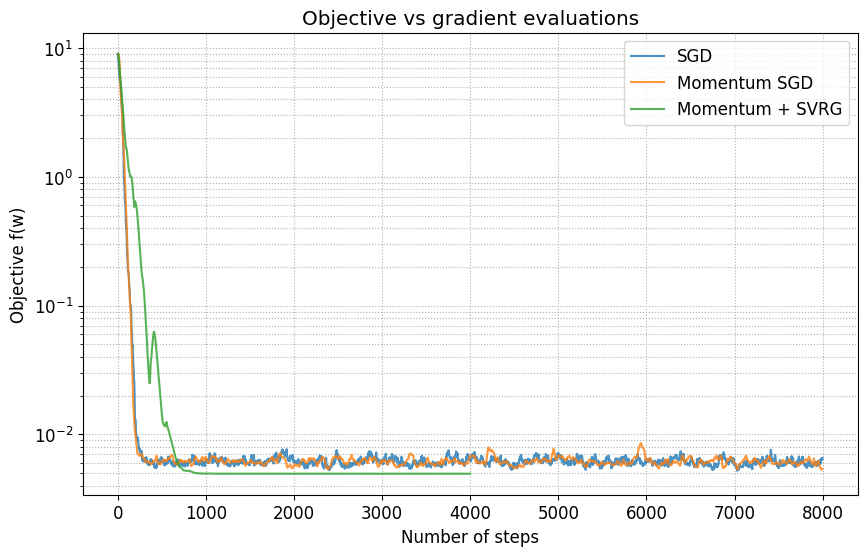

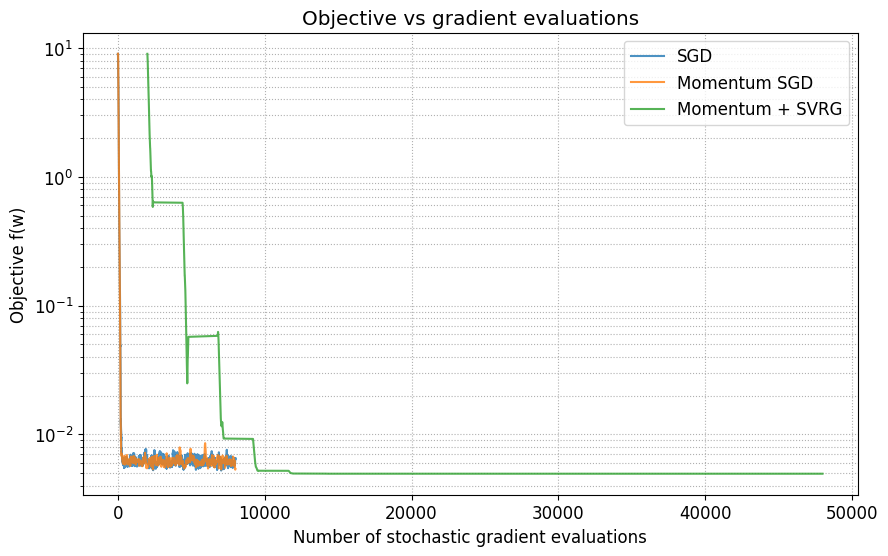

In [20]:
# Plot objective vs number of stochastic gradient evaluations

plt.figure()
plt.plot(range(len(obj_sgd)), obj_sgd, label="SGD", alpha=0.8)
plt.plot(range(len(obj_mom)), obj_mom, label="Momentum SGD", alpha=0.8)
plt.plot(range(len(obj_msvrg)), obj_msvrg, label="Momentum + SVRG", alpha=0.8)
plt.xlabel("Number of steps")
plt.ylabel("Objective f(w)")
plt.yscale("log")
plt.legend()
plt.title("Objective vs gradient evaluations")
plt.grid(True, which="both", ls=":")
plt.show()

plt.figure()
plt.plot(ge_sgd, obj_sgd, label="SGD", alpha=0.8)
plt.plot(ge_mom, obj_mom, label="Momentum SGD", alpha=0.8)
plt.plot(ge_msvrg, obj_msvrg, label="Momentum + SVRG", alpha=0.8)
plt.xlabel("Number of stochastic gradient evaluations")
plt.ylabel("Objective f(w)")
plt.yscale("log")
plt.legend()
plt.title("Objective vs gradient evaluations")
plt.grid(True, which="both", ls=":")
plt.show()

__Discussion__

All methods show good results with trade-off between accuracy and computational complexity.  

The plots highlight:

1. In terms of iterations, Momentum+SVRG converges fastest. It is expected because variance reduction reduces the noise in gradient estimates, while momentum smooths out stochastic noise.

2. In terms of gradient evaluations, Momentum+SVRG requires more gradient computations per iteration (due to the need for two stochastic gradients plus periodic full gradients). As teh result, it achieves much lower objective values per evaluation.

In this case Momentum SGD and plain SGD perform simillary. Averaging past gradients in Momentum can reduce oscillations, but on our syntetic data it doesn't show significant effect.

### Problem 2 (31pts)

__Problem 2.1__(2pts) Prove  that  linear  regression  problems   $f(x)  = \frac{1}{2n} \|Ax-b\|^2$   do  not  satisfy  Assumption  36  in general.

**Assumption 36:** There exists a constant $M > 0$ such that for all $x \in \mathbb{R}^d$ and $i \in [n]$,
$$
\|\nabla f_i(x)\| \le M.
$$

----

### Solution

2.1.1) For linear regression, each component function is:
$$
f_i(x) = \frac12 (a_i^\top x - b_i)^2,
$$

$$
\|\nabla f_i(x)\| = \|(a_i^\top x - b_i) a_i\|
$$


2.1.2) Take any $a_i \neq 0$. Choose $x = t \cdot \frac{a_i}{\|a_i\|^2}$ with $t \to \infty$. Then:

$$
a_i^\top x = t, \quad \|\nabla f_i(x)\| = |t - b_i| \cdot \|a_i\| \to \infty.
$$

Therefore, no finite $M$ can bound $\|\nabla f_i(x)\|$ for all $x \in \mathbb{R}^d$.

#### Interpretation

Assumption 36 requires uniformly bounded gradients for all $x$, which fails for linear regression because residuals $a_i^\top x - b_i$ grow as $\|x\| \to \infty$.  
Gradients are not globally bounded.

---

#### Solving the distributed optimization problem

__Problem 2.2__ 
Consider the empirical risk minimization:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w\|^2_2,
\end{equation}
where $\ell: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ is a loss function, $g : \mathbb{R}^d \times \mathbb{R}^x \to \mathbb{R}$ is a model, $w$ are parameters of the model, $\{x_i, y_i\}_{i=1}^n$ is data of objects $x_i \in \mathbb{R}^x$ and labels $y_i \in \mathbb{R}$.

We use the linear model $g(w, x) = w^T x$ and the logistic/sigmoid loss function: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Important: $y$ must take values -1 or 1__). As we already know, the resulting problem is called a logistic regression problem.

This problem can be rewritten as follows:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{s} \sum\limits_{j=1}^s f_j(w) := \frac{1}{s} \sum\limits_{j=1}^s \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_{(j-1)b + i}), y_{(j-1)b + i}) + \frac{\lambda}{2} \| w\|^2_2\right],
\end{equation}
where $b$ is the local data size, $s$ is the number of devices, and $b s = n$ is the total sample size.

The gradient of $f_j$:
$$
\nabla f_j(w) = \frac{1}{b} \sum_{i=1}^b \frac{-y_{(j-1)b + i} x_{(j-1)b + i}}{1 + \exp(y_{(j-1)b + i} w^Tx_{(j-1)b + i})} + \lambda w.
$$
The Lipschitz constant of the gradient $\nabla f_j$ can be estimated as $L_j = \frac{1}{4b} \sum\limits_{i=1}^b \| x_{(j-1)b + i} \|^2_2 + \lambda$.

Let us do some preparation work. The _mushrooms_ dataset is attached. Use the following code to generate a matrix $X$ and vector $y$, which will store the sample $\{x_i, y_i\}_{i=1}^n$:

In [21]:
dataset = "mushrooms.txt"  #the file must be in the same directory as notebook.

In [22]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

# Convert labels from {1,2} to {-1,1}
y = 2 * y - 3  # maps 1 -> -1, 2 -> 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3pts) For the training part $X_{train}$, $y_{train}$, estimate the constant $L$. Set $\lambda$ such that $\lambda \approx L / 1000$.  Realize in the code the calculation of the value and gradient for our target function ($X$, $y$, $\lambda$ should be given as a parameter so that it is possible to change them, not only to substitute fixed $X_{train}$, $y_{train}$). You can use ``numpy``, or ``autograd``, ``pytorch``, ``jax``.

In [23]:
import numpy as np

def logistic_loss(w, X, y, lam):
    """Compute logistic regression objective with L2 regularization."""
    z = X @ w
    loss = np.log(1 + np.exp(-y * z)).mean()
    reg = 0.5 * lam * np.sum(w**2)
    return loss + reg

def logistic_grad(w, X, y, lam):
    """Compute gradient of logistic regression objective."""
    z = X @ w
    sig = 1 / (1 + np.exp(y * z))  # σ(-y*z)
    grad = -(X.T @ (y * sig)) / len(y) + lam * w
    return grad

n_train, d = X_train.shape
L_est = 1 / 4 * np.mean(np.linalg.norm(X_train, axis=1)**2)  # factor 1/4 from logistic loss Hessian bound
lam = L_est / 1000
print(f"Estimated L = {L_est:.4f}, lambda = {lam:.6f}")

w_test = np.zeros(d)
print(f"Initial objective: {logistic_loss(w_test, X_train, y_train, lam):.4f}")
print(f"Gradient norm: {np.linalg.norm(logistic_grad(w_test, X_train, y_train, lam)):.4f}")

Estimated L = 5.2500, lambda = 0.005250
Initial objective: 0.6931
Gradient norm: 0.5685


(1pts) Since we have to deal with a distributed setting, we need to be able to divide the data into parts. The basic variant of this you have most likely already realized in the previous task when dividing data into batches. 

In [24]:
def split_data_uniform(X, y, s, shuffle=True):
    n = len(y)
    if shuffle:
        idx = np.random.permutation(n)
        X, y = X[idx], y[idx]

    X_splits = np.array_split(X, s)
    y_splits = np.array_split(y, s)
    return X_splits, y_splits

(5pts) Divide the data non-uniformly/heterogeneously, e.g., give some of the devices predominantly data with labels equal to $1$ and others with $- 1$. You can use this example, or you can figure out your own way how to split the data heterogeneously. In any case, describe your approach and implement it. Ideally, you should be able to vary the degree of heterogeneity from "uniformly" to "absolutely different" splits.

In [ ]:
def split_data_heterogeneous(X, y, s, heterogeneity=0.8):
    n = len(y)
    idx_pos = np.where(y == 1)[0]
    idx_neg = np.where(y == -1)[0]
    np.random.shuffle(idx_pos)
    np.random.shuffle(idx_neg)
    
    sizes = [n // s + (1 if i < n % s else 0) for i in range(s)] # Determine sizes for each device
    
    X_splits = []
    y_splits = []
    pos_ptr = 0
    neg_ptr = 0
    
    for i in range(s):
        if i % 2 == 0: # define biase towards
            prop_pos = 0.5 + heterogeneity * 0.5  
        else:
            prop_pos = 0.5 - heterogeneity * 0.5 

        size = sizes[i]
        n_pos = int(prop_pos * size)
        n_neg = size - n_pos
        
        idx = np.concatenate([idx_pos[pos_ptr:pos_ptr+n_pos], idx_neg[neg_ptr:neg_ptr+n_neg]])
        pos_ptr += n_pos
        neg_ptr += n_neg
        
        X_splits.append(X[idx])
        y_splits.append(y[idx])
    
    return X_splits, y_splits

__Local distributed methods__.

(5pts) Simulate the distributed enviroment with $s = 10$ and uniformly distributed data. Implement simple Local GD method (Algorithm 1 of [paper](https://arxiv.org/pdf/1909.04746.pdf), the paper considers SGD, but GD is enough), where you can choose the number of local steps $H$ as a parameter. Take a step is equal to $\frac{1}{L}$. What is $L$ here? The corresponding paper can give you an answer.

Vary the number of local steps: $H = 1, 5, 10, 20$. Draw the comparison plots for different $H$: 1) value of convergence criterion versus number of communications, 2) accuracy of predictions versus number of communications. Make a conclusion.

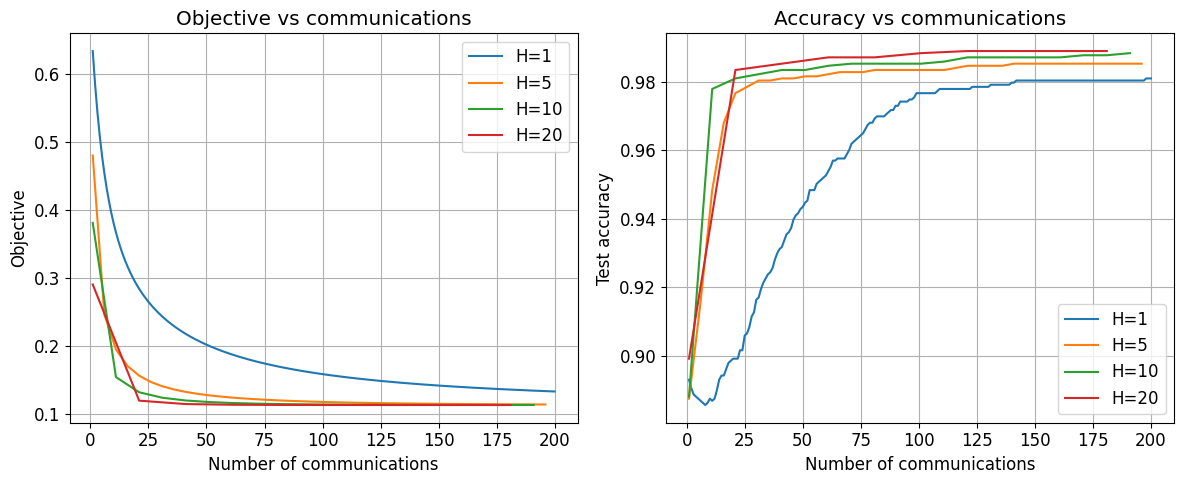

In [ ]:
def local_gd(X_splits, y_splits, lam, H, steps, eta, w0=None):
    s = len(X_splits)
    d = X_splits[0].shape[1]
    if w0 is None:
        w = np.zeros(d)
    else:
        w = w0.copy()
    
    comm_counts = []
    obj_values = []
    accuracies = []
    
    comm = 0
    for t in range(steps):
        w_locals = []
        for j in range(s):
            wj = w.copy()
            for _ in range(H):
                grad = logistic_grad(wj, X_splits[j], y_splits[j], lam)
                wj = wj - eta * grad
            w_locals.append(wj)
        
        w = np.mean(w_locals, axis=0)
        comm += 1
        
        if t % H == 0:
            comm_counts.append(comm)
            obj_values.append(logistic_loss(w, X_train, y_train, lam))

            y_pred = np.sign(X_test @ w)
            acc = np.mean(y_pred == y_test)
            accuracies.append(acc)
    
    return comm_counts, obj_values, accuracies, w

s = 10
X_uniform, y_uniform = split_data_uniform(X_train, y_train, s, shuffle=True)
steps = 200
eta = 1 / L_est

H_values = [1, 5, 10, 20]
results = {}
for H in H_values:
    comm, obj, acc, w_final = local_gd(X_uniform, y_uniform, lam, H, steps, eta)
    results[H] = (comm, obj, acc)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for H in H_values:
    comm, obj, _ = results[H]
    plt.plot(comm, obj, label=f'H={H}')
plt.xlabel('Number of communications')
plt.ylabel('Objective')
plt.legend()
plt.title('Objective vs communications')
plt.grid(True)

plt.subplot(1,2,2)
for H in H_values:
    comm, _, acc = results[H]
    plt.plot(comm, acc, label=f'H={H}')
plt.xlabel('Number of communications')
plt.ylabel('Test accuracy')
plt.legend()
plt.title('Accuracy vs communications')
plt.grid(True)

plt.tight_layout()
plt.show()

__Conclusion__: Increasing the number of local steps H reduces the number of communications needed to reach a given objective value or accuracy, because each device performs more work locally.

However, large H leads to increasing computational complexity on each device.

(5pts) Here we fix $s = 10$, $H = 10$ and change power of heterogeneity. Take a step is equal to $\frac{1}{L}$ (take into account that for each heterogeneity setting it is better to recompute $L$). Draw the comparison plots for $2-3$ different power of heterogeneity: 1) value of convergence criterion versus number of communications, 2) accuracy of predictions versus number of communications. Make a conclusion.

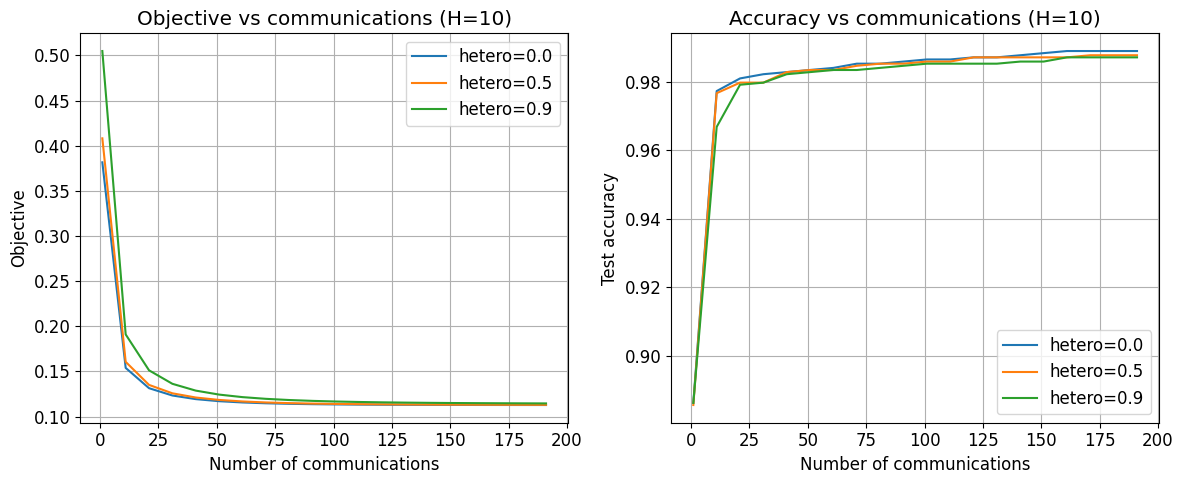

In [39]:
heterogeneity_levels = [0.0, 0.5, 0.9]
H = 10
steps = 200

results_hetero = {}
for hetero in heterogeneity_levels:
    X_het, y_het = split_data_heterogeneous(X_train, y_train, s, heterogeneity=hetero)

    L_max = 0
    for j in range(s):
        L_j = 0.25 * np.mean(np.linalg.norm(X_het[j], axis=1)**2) + lam
        if L_j > L_max:
            L_max = L_j
    eta_het = 1 / L_max
    
    comm, obj, acc, w_final = local_gd(X_het, y_het, lam, H, steps, eta_het)
    results_hetero[hetero] = (comm, obj, acc)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for hetero in heterogeneity_levels:
    comm, obj, _ = results_hetero[hetero]
    plt.plot(comm, obj, label=f'hetero={hetero}')
plt.xlabel('Number of communications')
plt.ylabel('Objective')
plt.legend()
plt.title('Objective vs communications (H=10)')
plt.grid(True)

plt.subplot(1,2,2)
for hetero in heterogeneity_levels:
    comm, _, acc = results_hetero[hetero]
    plt.plot(comm, acc, label=f'hetero={hetero}')
plt.xlabel('Number of communications')
plt.ylabel('Test accuracy')
plt.legend()
plt.title('Accuracy vs communications (H=10)')
plt.grid(True)

plt.tight_layout()
plt.show()

__Conclusion__: Higher heterogeneity slows down convergence because local data distributions diverge, causing local updates to be biased. The algorithm requires more communication rounds to average out these biases and reach consensus.

__Problem 2.2__ __Distributed with compression methods__.

(5pts) Implement the $\text{Rand}k$ compression operators, where $k$ is a parameter.

In [40]:
def randk_compress(v, percent):
    d = len(v)
    k = max(1, int(d * percent / 100))
    indices = np.random.choice(d, size=k, replace=False)
    compressed = np.zeros(d)
    compressed[indices] = v[indices]
    return compressed, indices

(5pts) Simulate a distributed  environment with $s=10$ parts and uniformly distributed data. Implement simple distributed gradient descent with compression operators. Compress information only from the devices to the server. Use compression operators $\text{Rand}1\%$, $\text{Rand}5\%$, $\text{Rand}10\%$, $\text{Rand}20\%$. Use steps are equal to $L^{-1} (\frac{2 \omega}{s} + 1)^{-1}$ (theoretical). Explain what is $L$ and $\omega$ here. 

Draw the comparison plots for different operators: 1) convergence criterion value versus number of transmitted coordinates from the devices to the server, 2) prediction accuracy versus number of transmitted coordinates from the devices to the server. Make a conclusion.

In [49]:
def compressed_gd(X_splits, y_splits, lam, steps, eta, compress_func):
    s = len(X_splits)
    d = X_splits[0].shape[1]
    w = np.zeros(d)
    
    transmitted_coords = []
    obj_values = []
    accuracies = []
    total_coords = 0
    
    for t in range(steps):
        grads = []
        coords_used = 0
        for j in range(s):
            gj = logistic_grad(w, X_splits[j], y_splits[j], lam)
            gj_comp, idx = compress_func(gj)
            grads.append(gj_comp)
            coords_used += len(idx)
        
        total_coords += coords_used
        g_avg = np.mean(grads, axis=0)
        w = w - eta * g_avg
        
        if t % 5 == 0:
            transmitted_coords.append(total_coords)
            obj_values.append(logistic_loss(w, X_train, y_train, lam))
            y_pred = np.sign(X_test @ w)
            acc = np.mean(y_pred == y_test)
            accuracies.append(acc)
    
    return transmitted_coords, obj_values, accuracies, w

s = 10
X_uniform, y_uniform = split_data_uniform(X_train, y_train, s, shuffle=True)
steps = 200

d = X_train.shape[1]
compressors = [
    ("Rand1%", lambda v: randk_compress(v, 1)),
    ("Rand5%", lambda v: randk_compress(v, 5)),
    ("Rand10%", lambda v: randk_compress(v, 10)),
    ("Rand20%", lambda v: randk_compress(v, 20)),
]

results_comp = {}
multiplier = [20, 4, 2, 1]; i = 0;
for name, comp_func in compressors:
    percent = float(name[4:-1])
    k = max(1, int(d * percent / 100))
    omega = d / k - 1
    eta_comp = 1 / (L_est * (2 * omega / s + 1))
    print(f"{name}: k={k}, omega={omega:.2f}, eta={eta_comp:.6f}")
    
    coords, obj, acc, w = compressed_gd(X_uniform, y_uniform, lam, steps * multiplier[i], eta_comp, comp_func)
    results_comp[name] = (coords, obj, acc)
    i += 1


Rand1%: k=1, omega=111.00, eta=0.008210
Rand5%: k=5, omega=21.40, eta=0.036075
Rand10%: k=11, omega=9.18, eta=0.067155
Rand20%: k=22, omega=4.09, eta=0.104762


$L$ is the smoothness constant of the global objective over devices. $\omega$ is the compression variance parameter: for Randk, $\omega = d/k - 1$.

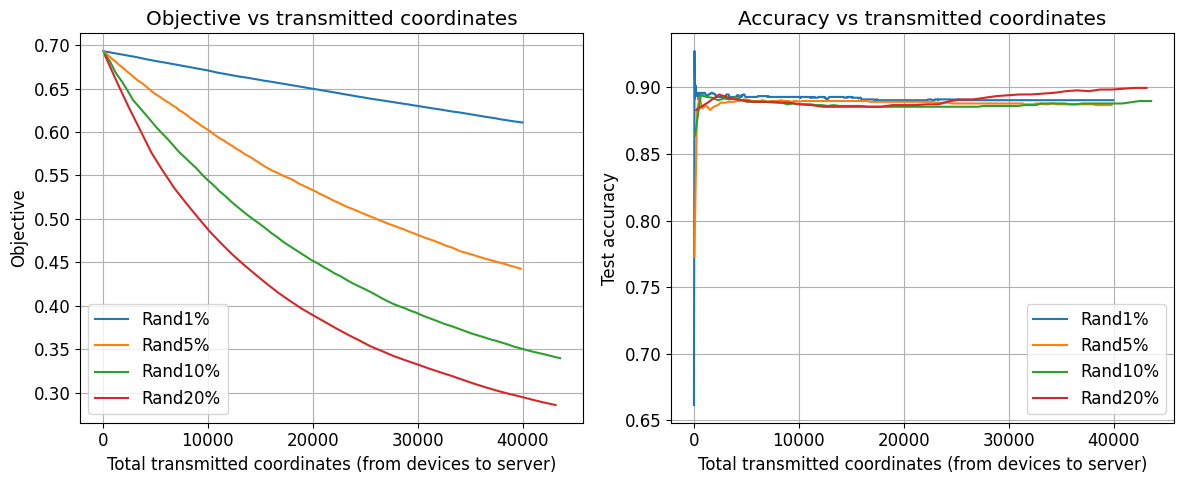

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, (coords, obj, _) in results_comp.items():
    plt.plot(coords, obj, label=name)
plt.xlabel('Total transmitted coordinates (from devices to server)')
plt.ylabel('Objective')
plt.legend()
plt.title('Objective vs transmitted coordinates')
plt.grid(True)

plt.subplot(1,2,2)
for name, (coords, _, acc) in results_comp.items():
    plt.plot(coords, acc, label=name)
plt.xlabel('Total transmitted coordinates (from devices to server)')
plt.ylabel('Test accuracy')
plt.legend()
plt.title('Accuracy vs transmitted coordinates')
plt.grid(True)

plt.tight_layout()
plt.show()

__Conclusion__: Stronger compression (smaller $k$) reduces communication cost per round but requires more rounds to achieve the same accuracy. There is a trade‑off: for high‑bandwidth networks, weaker compression potentially converges faster. However, for low‑bandwidth, stronger compression may be preferable.  
In the experiment, all variants achive accuracy more that 0.89, but weaker (rand20%) compression a little bit better.  

(5pts)(bonus) Try to tune the step for each case from the previous point. Explain how you determine that the step is "the best" (there is no universal recipe here, just your thoughts)

Draw the comparison plots for different operators and tuned steps for them: 1) convergence criterion value versus number of transmitted coordinates from the devices to the server, 2) prediction accuracy versus number of transmitted coordinates from the devices to the server. Make a conclusion.

Rand1%: theoretical eta=0.008210, best eta=0.016420
Rand5%: theoretical eta=0.036075, best eta=0.072150
Rand10%: theoretical eta=0.067155, best eta=0.134310
Rand20%: theoretical eta=0.104762, best eta=0.209524


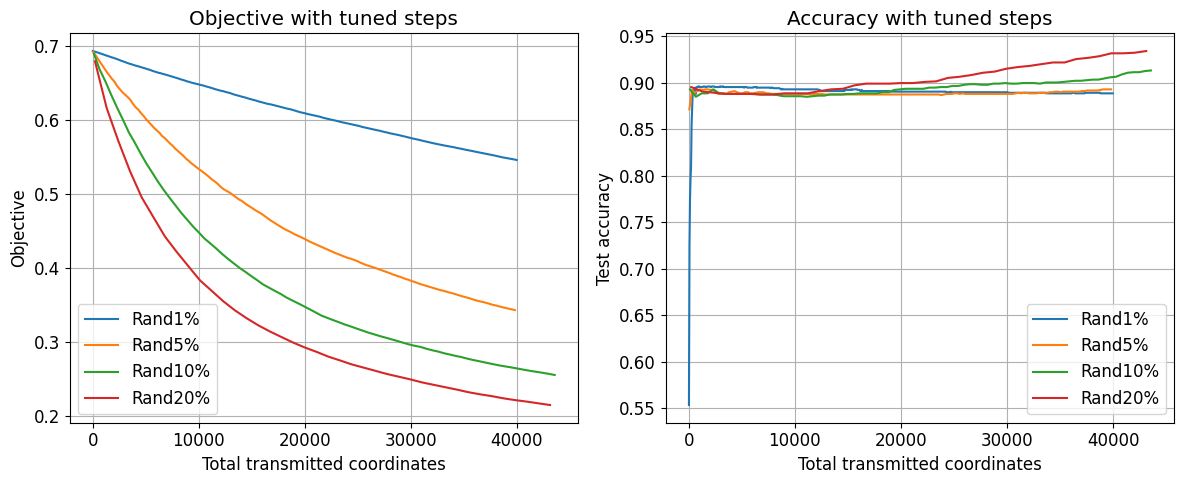

In [52]:
# multiply theoretical step by a factor
factors = [0.5, 1.0, 2.0]
best_etas = {}

for name, comp_func in compressors:
    percent = float(name[4:-1])
    k = max(1, int(d * percent / 100))
    omega = d / k - 1
    eta_theory = 1 / (L_est * (2 * omega / s + 1))
    
    best_obj = np.inf
    best_eta = eta_theory
    for factor in factors:
        eta = factor * eta_theory
        coords, obj, acc, w = compressed_gd(X_uniform, y_uniform, lam, steps, eta, comp_func)
        if obj[-1] < best_obj:
            best_obj = obj[-1]
            best_eta = eta
    best_etas[name] = best_eta
    print(f"{name}: theoretical eta={eta_theory:.6f}, best eta={best_eta:.6f}")

results_tuned = {}

multiplier = [20, 4, 2, 1]; i = 0;
for name, comp_func in compressors:
    eta = best_etas[name]
    coords, obj, acc, w = compressed_gd(X_uniform, y_uniform, lam, steps * multiplier[i], eta, comp_func)
    results_tuned[name] = (coords, obj, acc)
    i += 1

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, (coords, obj, _) in results_tuned.items():
    plt.plot(coords, obj, label=name)
plt.xlabel('Total transmitted coordinates')
plt.ylabel('Objective')
plt.legend()
plt.title('Objective with tuned steps')
plt.grid(True)

plt.subplot(1,2,2)
for name, (coords, _, acc) in results_tuned.items():
    plt.plot(coords, acc, label=name)
plt.xlabel('Total transmitted coordinates')
plt.ylabel('Test accuracy')
plt.legend()
plt.title('Accuracy with tuned steps')
plt.grid(True)

plt.tight_layout()
plt.show()

Tuning the step size improves convergence in that scenario. The best option is still rand20% with about 0.94 accuracy.  
The best step is chosen as the one giving the lowest final objective for a predefined multipliers, after a fixed number of iterations.  

(5pts)(bonus) Here we fix $s = 10$, $\text{Rand}10\%$ and change power of heterogeneity. Take a step is equal to $L^{-1} (\frac{2 \omega}{s} + 1)^{-1}$ (take into account that for each heterogeneity setting it is better to recompute $L$). Draw the comparison plots for $2-3$ different power of heterogeneity: 1) convergence criterion value versus number of transmitted coordinates from the devices to the server, 2) prediction accuracy versus number of transmitted coordinates from the devices to the server. Make a conclusion.

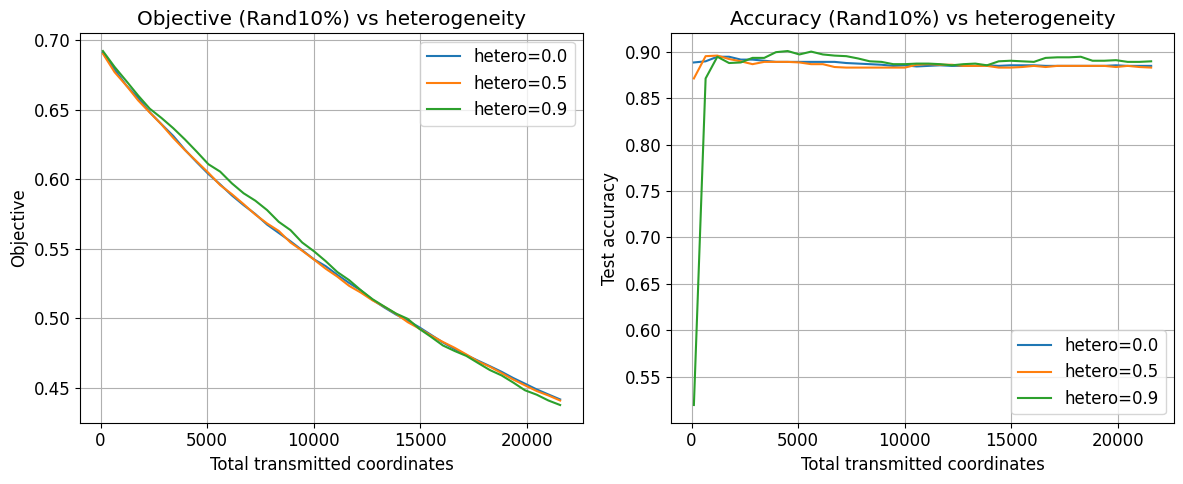

In [57]:
heterogeneity_levels = [0.0, 0.5, 0.9]
percent = 10
k = max(1, int(d * percent / 100))
omega = d / k - 1

results_hetero_comp = {}
for hetero in heterogeneity_levels:
    X_het, y_het = split_data_heterogeneous(X_train, y_train, s, heterogeneity=hetero)
    L_max = 0
    for j in range(s):
        L_j = 0.25 * np.mean(np.linalg.norm(X_het[j], axis=1)**2) + lam
        if L_j > L_max:
            L_max = L_j
    eta_het = 1 / (L_max * (2 * omega / s + 1))
    
    coords, obj, acc, w = compressed_gd(X_het, y_het, lam, steps, eta_het, 
                                        lambda v: randk_compress(v, percent))
    results_hetero_comp[hetero] = (coords, obj, acc)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for hetero in heterogeneity_levels:
    coords, obj, _ = results_hetero_comp[hetero]
    plt.plot(coords, obj, label=f'hetero={hetero}')
plt.xlabel('Total transmitted coordinates')
plt.ylabel('Objective')
plt.legend()
plt.title('Objective (Rand10%) vs heterogeneity')
plt.grid(True)

plt.subplot(1,2,2)
for hetero in heterogeneity_levels:
    coords, _, acc = results_hetero_comp[hetero]
    plt.plot(coords, acc, label=f'hetero={hetero}')
plt.xlabel('Total transmitted coordinates')
plt.ylabel('Test accuracy')
plt.legend()
plt.title('Accuracy (Rand10%) vs heterogeneity')
plt.grid(True)

plt.tight_layout()
plt.show()

__Conclusion__: in that case, heterogeneity doesn't affect convergence. Probably, the noise from compression shadow data heterogneity effect.